## Course project
- Submit:
    - a ipynb file
    - a project report as pdf (there is no minimum of # pages)
    - a link of your presentation video to slack #dsc522sp20
- Presentation as video:
    - use ppt or some visual aids
    - every team member should present
    - 15-20 minutes
    - Q&A will be done on slack
    
- Deadline
    - Apr 30 at 11:59 pm

## Hierarchical Clustering
Hierarchical aka agglomerative 

Agglomerative clustering is a powerful, flexible hierarchical clustering algorithm. In
agglomerative  clustering,  all  observations  start  as  their  own  clusters.  Next,  clusters
meeting some criteria are merged together. This process is repeated, growing clusters until some end point is reached. 

Hierarchical  clustering  works  on  a  data  set  with  n  records  and *p*  variables  and  is
based on two basic building blocks:

- A distance metric 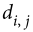 to measure the distance beween two records i and j.

- A dissimilarity metric  to measure the difference between two clusters A and B based on the distances *di, j* between the members of each cluster.


For applications involving numeric data, the most importance choice is the dissimilarity  metric. 

In scikit-learn,  AgglomerativeClustering  uses the
linkage  parameter to determine the merging strategy to minimize the following:
1.  Minimum of the distances between all observations of the two sets ( single )
2.  Average distance between observations from pairs of clusters ( average )
3.  Maximum distance between observations from pairs of clusters ( complete )
4.  Minimum the variance of the clusters being merged (**ward**). Scikit learn default. 

Merge small clusters to a specified number of bigger clusters.  
Have to define distance, so need to apply SCALING. 



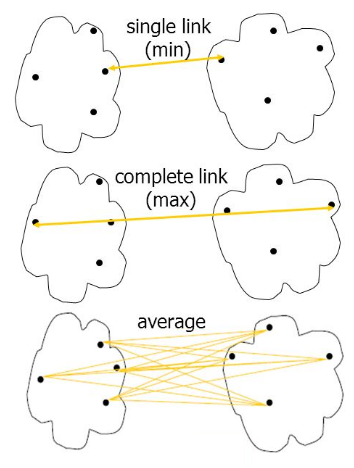

See a complete comparison of different linkages here: http://scikit-learn.org/dev/auto_examples/cluster/plot_linkage_comparison.html
<s>(but single linkage is no longer available in sklearn)</s>  
Was deleted, now re-added. 

Two other parameters are useful to know. First, the  *affinity*  parameter determines 
the  distance  metric  used  for  linkage   ( minkowski ,  euclidean ,  etc.).  Second,  *n_clusters*  sets the number of clusters the clustering algorithm will attempt to find. That is,
clusters are successively merged until there are only  n_clusters  remaining.

AVERAGE example: 


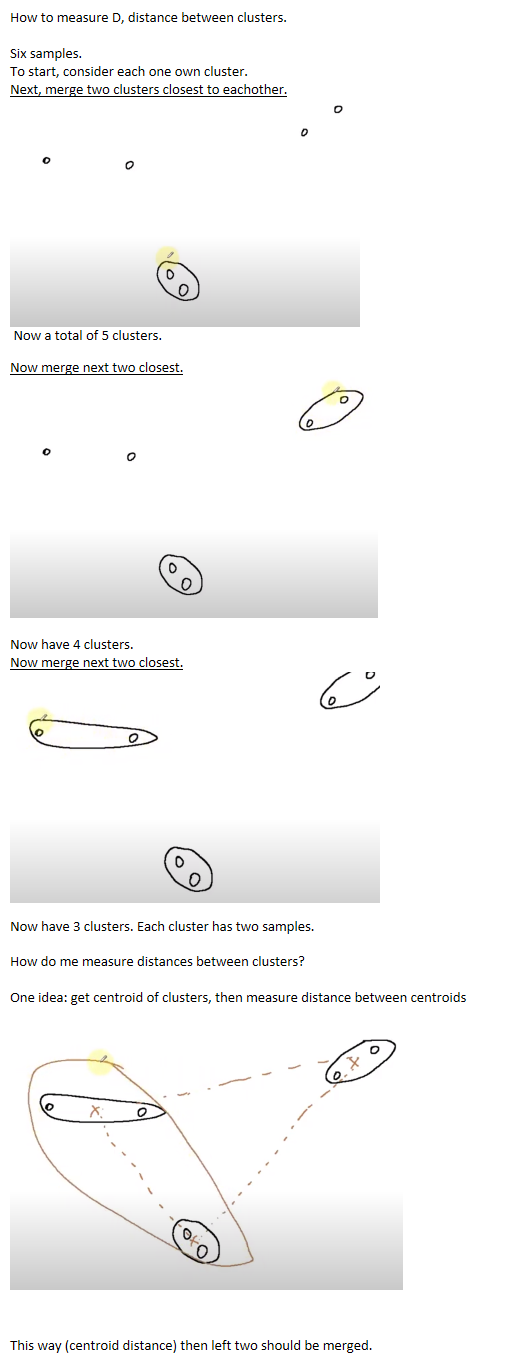

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
#drop class labels to do clustering, then do cross tabulation to evaluate performance

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
# Standardize features
#must scale because measuring distances!
scaler = StandardScaler()
features_std = scaler.fit_transform(df)
features_std = pd.DataFrame(features_std, columns=data['feature_names'])
features_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
cluster = AgglomerativeClustering(n_clusters=3) #create model and specify 3 clusters because I know there are three flowers
# Train model
model = cluster.fit(features_std)

In [11]:
model.labels_ #model labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Cross tabulation

In [12]:
data['target'] #data labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df = pd.DataFrame({'predicted_labels':model.labels_, 'species':data['target']})
df.head()
# the first 5 lines of this data frame look confusing, 
# but it does not mean the clustering result is wrong

,predicted_labels,species
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
#cross tabulation
#problem: for predicted class 0, have 23 of one class and 48 of another class. 
#cluster 1 predicted all of one- very good. 

ct = pd.crosstab(df['predicted_labels'], df['species'])
ct

species,0,1,2
predicted_labels,,,
0,0,23,48
1,49,0,0
2,1,27,2


This is how the data is: one flower separate, two flowers overlapping
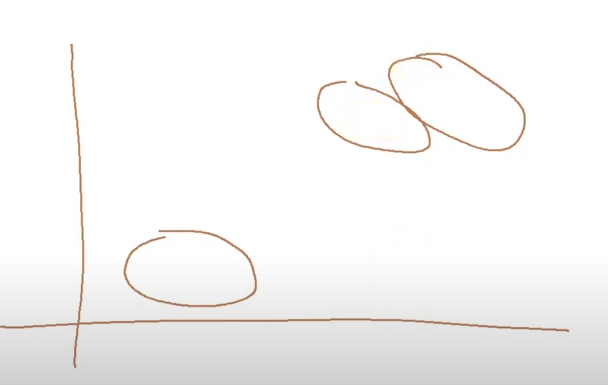

In [15]:
cluster = AgglomerativeClustering(n_clusters=3, linkage="average") #try specificying linkage

model = cluster.fit(features_std)
df = pd.DataFrame({'predicted_labels':model.labels_, 'species':data['target']})
ct = pd.crosstab(df['predicted_labels'], df['species'])
ct

species,0,1,2
predicted_labels,,,
0,50,0,0
1,0,50,47
2,0,0,3


In [ ]:
#not better, even worse. 
#cluster two has 100% of the two remaining classes. Maybe do Kmeans for this dataset. 

## Exercise:
You are given a seed dataset and a prior knowledge that there are 3 different types of seeds. Please ty to cluster the samples into 3 differnt clusters and show a cross tabulation of your result.

Are you able to get the same, or better result than mine? =)

Also, try a kmeans clustering model and see whether hierarchical performs better than Kmeans.

In [16]:
column_names = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', \
                'asymmetry coefficient', 'length of kernel groove', 'class']
samples = pd.read_csv('datasets/seeds_dataset.txt',sep='\t', names  = column_names)
samples.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [18]:
# preprocessing
#ranges of seeds are varied, so standard scaling needed. 
X = samples.drop(['class'], axis=1) #need to drop to cluster
y = samples['class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
# Create a AgglomerativeClustering model with 3 clusters: model
model = AgglomerativeClustering(n_clusters=3) #did not specify other hyperparamters

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and class as columns: df
df = pd.DataFrame({'labels': labels, 'class': samples['class']})

ct =  pd.crosstab(df['labels'], df['class'])

# display ct
ct

class,1,2,3
labels,,,
0,64,4,5
1,4,66,0
2,2,0,65


In [23]:
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and class as columns: df
df=pd.DataFrame({'labels':labels, 'class': samples['class']})

# Create crosstab: ct
ct=pd.crosstab(df['labels'], df['class'])

# display ct
ct

class,1,2,3
labels,,,
0,62,5,4
1,2,65,0
2,6,0,66


Kmeans gives similar results even though very different algorithms

What does it mean if you get similar results from both Hierarchical and Kmeans clustering??  
Likely that this is a easy dataset/beautiful dataset with three clusters which are easy to identify

Shape of the three clusters are in round of spherical shape


## To sum up:
Hierarchical clustering is a "bottom up" clustering algorithm:
- each observation starts in its own cluster
- pairs of clusters are merged as one moves up the hierarchy
- different linkage approach may produce different clustering results

